## Проверка нормальности распределения

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import statsmodels

Populating the interactive namespace from numpy and matplotlib


Загрузим данные - время реакции, с.

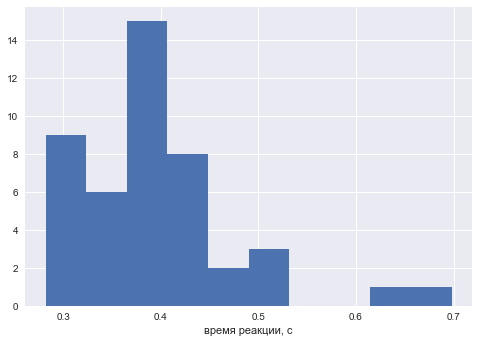

In [8]:
D = pd.read_table('rt.tsv')
vv=D.v
hist(vv); xlabel('время реакции, с');

Стандартная проверка - по статистике хи-квадрат, комбинирующей z-тесты асимметрии и куртозиса.

In [4]:
import scipy.stats as stats

In [5]:
stats.normaltest(vv)

NormaltestResult(statistic=19.306090837311309, pvalue=6.4229662667425542e-05)

p очень маленькое, значит отвергаем гипотезу о нормальности распределения. Увы, распределение ВР почти всегда скошено вправо.

Более мощный тест (по мнению [некоторых источников](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)) - Шапиро-Уилка (Shapiro-Wilk). Подходит для небольших выборок.

In [9]:
stats.shapiro(vv)

(0.8942419290542603, 0.0006301295361481607)

p-value на порядок больше.

Тест Колмогорова-Смирнова может быть применен более широко, чем Шапиро, поскольку он сравнивает любые два распределения друг с другом, а не обязательно с нормальным.
Для правильного использования необходимо z-преобразование.

In [19]:
zz=(vv-vv.mean())/vv.std()
stats.kstest(zz, cdf='norm')

KstestResult(statistic=0.13302340605342189, pvalue=0.37278688652794356)

Еще есть тест Андерсона - вариант теста Колмогорова-Смирнова.

In [11]:
stats.anderson(vv)

AndersonResult(statistic=1.0696390939463214, critical_values=array([ 0.535,  0.609,  0.731,  0.853,  1.014]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Только последние два теста на 5% уровне значимости показали, что распределение нормальное.

Попробуем убрать выбросы более .5 с из набора данных.

In [13]:
vv_ = vv[vv<0.5]
print('{} -> {}'.format(len(vv),len(vv_)))

45 -> 40


In [14]:
stats.normaltest(vv_)

NormaltestResult(statistic=2.2501961865640294, pvalue=0.32462062269421166)

In [15]:
stats.shapiro(vv_)

(0.9592655301094055, 0.15807799994945526)

In [18]:
stats.kstest((vv_-vv_.mean())/vv_.std(), cdf='norm')

KstestResult(statistic=0.10612495428368313, pvalue=0.75890822227626531)

In [20]:
stats.anderson(vv_)

AndersonResult(statistic=0.47606646495707139, critical_values=array([ 0.531,  0.605,  0.726,  0.847,  1.007]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Вывод: после удаления выбросов для анализа ВР можно использовать параметрические методы.